# Repeat stuff repeat stuff repeat stuff repeat stuff

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from transformers import (
    GPT2LMHeadModel, 
    GPT2TokenizerFast, 
    GPT2Config
)

from pathlib import Path
from os import getenv

In [27]:
def compute_token_scores(text, tokenizer, model):
    encodings = tokenizer(
        text,
        return_tensors="pt"
    )
    
    with torch.no_grad():
        outputs = model(encodings.input_ids)
    
    # Logits are those for next token, so we drop the last
    _logp = torch.log_softmax(outputs.logits, dim=-1)[:, :-1, :]
    _indices = encodings.input_ids[:, 1:].unsqueeze(-1)
    return torch.gather(_logp, index=_indices, dim=-1).squeeze()

In [28]:
gpt_model_rinit = GPT2LMHeadModel(GPT2Config())
gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [19]:
text = """
So, I wanted to run this quick experiment on repetition in large language
models, but unfortunately it appears that everything (by which I mean, of course
every piece of text with which I would naturally experiment) is in the GPT2 training data.
Now, I'm not sure about this -- obviously that's a pretty broad claim -- but certainly
when I ran an experiment on some data related to detecting AI-generated text from Kaggle,
I found that after about two hundred tokens the probability for each next token converged to
one. This seems to suggest something. Something troublesome. Specifically, that all the 
data, at least from this detect AI generated text competition are in the training data. Because, 
I mean, the probability of the next word being one suggests that there's only one possible word 
that can come next, and obviously that's not a statement about language but rather about language
that has been written before. And so I find myself writing this somewhat rambling story (or, perhaps,
rant) all so that I can maximize the chances that I create a new string of text and thus get
a result that reflects the model's actual knowledge of language, and in particular its
performance on repeated language, as opposed to a result that is secretly about memorization
and model capacity. Really, this is not the most helpful experiment, but it's my experiment 
and so something about rifles and ownership and semper fi and hopefully you get where I'm going with this.
"""
text = " ".join(text.split("\n")).strip()
len(text.split())

249

In [24]:
first_sentence = text.split(".")[0]
len(first_sentence.split())
repeated_text = ". ".join(6 * [first_sentence]) + "."
repeated_text

'So, I wanted to run this quick experiment on repetition in large language models, but unfortunately it appears that everything (by which I mean, of course every piece of text with which I would naturally experiment) is in the GPT2 training data. So, I wanted to run this quick experiment on repetition in large language models, but unfortunately it appears that everything (by which I mean, of course every piece of text with which I would naturally experiment) is in the GPT2 training data. So, I wanted to run this quick experiment on repetition in large language models, but unfortunately it appears that everything (by which I mean, of course every piece of text with which I would naturally experiment) is in the GPT2 training data. So, I wanted to run this quick experiment on repetition in large language models, but unfortunately it appears that everything (by which I mean, of course every piece of text with which I would naturally experiment) is in the GPT2 training data. So, I wanted to

In [44]:
semi_repeated_text = f"""
{first_sentence}. So, I wanted to quickly run an experiment concerning the tendency
of large language models to be repetitive. However, it seems that the data I wanted
to use initially are likely already in the GPT2 training data. So, I had this idea
to run this quick experiment on repetition in large language models, but unfortunately 
it appears that everything is in the GPT2 training data. So, I intended to run a simple
experiment on repetition in large language models, but unfortunately it appears that all
of the data of the sort I might employ were likely already in the original data set used
to train GPT2.
"""
semi_repeated_text = " ".join(semi_repeated_text.split("\n")).strip()

In [45]:
logp0_text = compute_token_scores(text, gpt_tokenizer, gpt_model)
logp0_repeated = compute_token_scores(repeated_text, gpt_tokenizer, gpt_model)
logp0_semi = compute_token_scores(semi_repeated_text, gpt_tokenizer, gpt_model)
logp0_repeated_rinit = compute_token_scores(repeated_text, gpt_tokenizer, gpt_model_rinit)

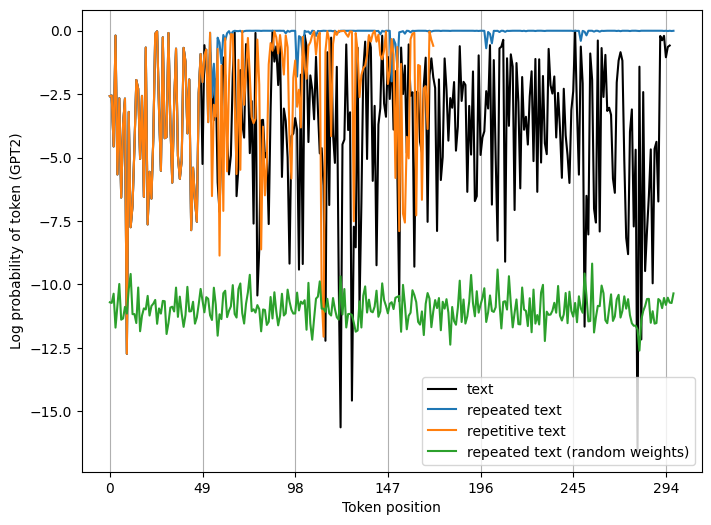

In [47]:
n_toks = gpt_tokenizer(first_sentence, return_tensors="pt").input_ids.shape[-1]

plt.figure(figsize=(8, 6))
plt.plot(logp0_text, label="text", color="k")
plt.plot(logp0_repeated, label="repeated text")
plt.plot(logp0_semi, label="repetitive text")
plt.plot(logp0_repeated_rinit, label="repeated text (random weights)")
plt.xlabel("Token position")
plt.ylabel("Log probability of token (GPT2)")
plt.xticks(n_toks * np.arange(0, 7))
plt.grid(axis="x")
plt.legend()
plt.show()